# Problem Komiwojażera przy pomocy Algorytmów Genetycznych
## By Szymon Skrzypczyk ;)

In [1]:
from typing import Literal
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
  # beda jako parametry
# rozmiary 
# ilosc punktow n
# warunek koncowy
n = 50
selected_items = 25
distance_threshold = 100
POP_SIZE = 500
cross_prob = 0.8
mutation_prob = 0.2
selection_method = "ranking"  # "roulette"

In [3]:
cities = np.random.uniform(0, 300, (n, 2))
# dystans euklidesowski
calc_distance = lambda p1, p2: np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

calc_distance(cities[0], cities[1])

np.float64(24.247083137360057)

## Położenie miast na "mapie"

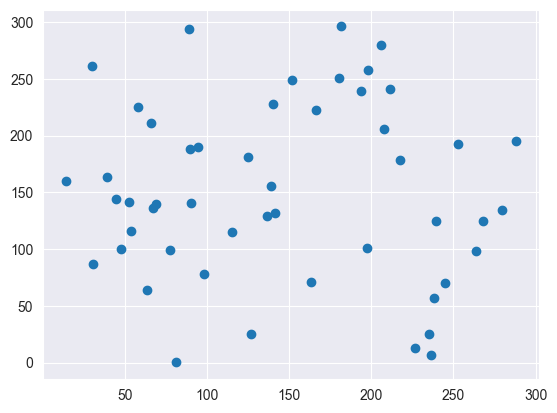

In [4]:
# do poprawy stylownia itd itd
plt.scatter(cities[:, 0], cities[:, 1])

## macierz dystansow miedzy miastami

In [5]:
# tablica odleglosci 
distances = []
for nx in range(n):
    distances_nx = []
    for mx in range(n):
        if mx == nx:
            distances_nx.append(np.nan)
        distances_nx.append(calc_distance(cities[nx], cities[mx]))
                            
    distances.append(distances_nx)

distances = pd.DataFrame(distances)
distances

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,NaN,0.000000,24.247083,178.440533,59.517788,26.000948,210.631685,182.204697,221.299186,93.906368,...,141.585160,196.133337,185.401477,44.024019,147.545353,84.853643,84.030551,226.345721,223.979851,96.485689
1,24.247083,NaN,0.000000,157.203925,58.039282,15.094507,200.406679,159.900587,197.081737,74.480786,...,117.441967,189.548746,161.610561,23.659087,130.496141,60.689577,70.087772,212.459441,200.163894,73.288366
2,178.440533,157.203925,NaN,0.000000,199.147182,167.665816,121.307004,148.065038,93.818497,85.331957,...,71.176176,140.932000,52.765191,134.558211,185.891206,114.296574,104.331299,101.081799,73.777319,86.595324
3,59.517788,58.039282,199.147182,NaN,0.000000,42.964857,257.222192,154.055836,216.231796,124.842915,...,143.267593,247.490445,189.798869,78.585007,102.732442,86.035866,126.407775,266.581090,226.601770,112.815552
4,26.000948,15.094507,167.665816,42.964857,NaN,0.000000,215.250876,157.002041,201.268464,87.015166,...,122.666337,204.639901,168.068900,37.278649,121.788027,63.900628,84.679451,226.589534,206.401899,81.986513
5,210.631685,200.406679,121.307004,257.222192,215.250876,NaN,0.000000,262.638744,214.059696,137.514616,...,179.166097,34.308518,173.996946,178.640205,284.716437,192.480046,130.814510,39.512949,190.242273,161.665357
6,182.204697,159.900587,148.065038,154.055836,157.002041,262.638744,NaN,0.000000,92.888102,147.375590,...,83.801151,273.129926,101.163779,153.912478,67.430682,104.474059,171.653530,248.536097,118.216971,118.937266
7,221.299186,197.081737,93.818497,216.231796,201.268464,214.059696,92.888102,NaN,0.000000,146.904127,...,79.992189,234.744307,45.060620,180.640584,155.557523,137.377350,172.622199,188.641772,29.433410,128.502312
8,93.906368,74.480786,85.331957,124.842915,87.015166,137.514616,147.375590,146.904127,NaN,0.000000,...,72.265989,136.203346,104.097354,50.925120,151.398175,56.024101,26.252507,142.179891,141.211921,28.894623
9,89.259247,74.876080,99.508160,130.774300,89.338395,126.519341,171.179960,169.435839,24.331793,NaN,...,96.426957,119.939177,125.683300,52.280713,171.009555,75.158620,5.349755,137.749664,161.658503,52.251999


In [6]:
def calculate_distance_chromosome(chromosome):
    total = 0
    for start_el, next_el in zip(chromosome[:-1], chromosome[1:]):
        total += distances.iloc[int(start_el), int(next_el)]
    return total

In [7]:
def sort_by_distance(distances_list: np.array, how: Literal["asc", "desc"] = "asc") -> np.array:
    sorted_distances = distances_list.copy()
    distances_with_metrics = np.array([calculate_distance_chromosome(chromosome) for chromosome in sorted_distances])

    if how == "asc":
        sorted_indices = np.argsort(distances_with_metrics)
    elif how == "desc":
        sorted_indices = np.argsort(-distances_with_metrics)
    else:
        raise ValueError("Invalid sort order. Use 'asc' or 'desc'!")

    sorted_distances = distances_list[sorted_indices]
    return sorted_distances


In [8]:
population = np.array([np.random.permutation(distances.index) for _ in range(POP_SIZE)])
metrics = np.array([calculate_distance_chromosome(chromosome) for chromosome in population])

# Add the metric as an extra column to the population array
population_with_metrics = np.hstack((population, metrics.reshape(-1, 1)))

population_with_metrics

array([[2.00000000e+01, 5.00000000e+00, 1.00000000e+01, ...,
        4.50000000e+01, 2.90000000e+01, 6.85057239e+03],
       [1.40000000e+01, 2.30000000e+01, 4.50000000e+01, ...,
        8.00000000e+00, 4.20000000e+01, 7.09865213e+03],
       [2.40000000e+01, 4.50000000e+01, 2.20000000e+01, ...,
        4.20000000e+01, 1.50000000e+01, 7.31271215e+03],
       ...,
       [3.40000000e+01, 2.10000000e+01, 3.60000000e+01, ...,
        2.50000000e+01, 0.00000000e+00, 6.98963884e+03],
       [4.40000000e+01, 3.50000000e+01, 2.20000000e+01, ...,
        5.00000000e+00, 2.80000000e+01, 7.54761488e+03],
       [1.10000000e+01, 3.20000000e+01, 3.80000000e+01, ...,
        2.00000000e+01, 1.60000000e+01, 6.89210823e+03]], shape=(500, 51))

In [9]:
def add_metric_column(pop_chromosome: np.array) -> np.array:
    print(pop_chromosome)
    metrics_row = np.array([calculate_distance_chromosome(chromosome) for chromosome in pop_chromosome])
    # Add the metric as an extra column to the population array
    pop_chromosome_with_metrics = np.hstack((pop_chromosome, metrics_row.reshape(-1, 1)))
    return pop_chromosome_with_metrics

## Operatory genetyczne

In [10]:
def mutate(pop_list):
    pop_el = pop_list.copy()
    # phase 1
    exchange_element_1 = randint(0, n - 1)
    exchange_element_2 = randint(0, n - 1)

    # can't swap the same element, but they will be distinct by definition
    # while exchange_element_2 == exchange_element_1:
    #    exchange_element_2 = randint(0, n)

    pop_el[exchange_element_1], pop_el[exchange_element_2] = pop_el[exchange_element_2], pop_el[exchange_element_1]

    # Phase 2
    exchange_start = randint(0, n - 2)
    exchange_end = randint(exchange_start + 1, n - 1)
    # the index cannot be larger than the actual array
    exchange_end = min(exchange_end, len(pop_el))

    el_start = pop_el[exchange_start]
    pop_el = np.delete(pop_el, exchange_start)
    pop_el = np.insert(pop_el, exchange_end, el_start)


    return pop_el

mutate(population[9])

array([47, 31, 37, 23, 30,  0, 35, 40,  8, 14, 41, 34, 11, 28, 45, 42, 15,
       43, 17, 24,  1,  5,  2,  6, 22, 12, 10, 21, 25,  7, 19, 48, 16, 44,
       49,  3, 38, 26, 18, 29,  4, 46, 20, 33, 27, 36,  9, 13, 39, 32])

In [11]:
def crossover(parent1, parent2):
    child = np.full(n, -1) 

    exchange_start = randint(0, n - 1) 
    exchange_end = randint(exchange_start + 1, n)  

    # assign crossover elements
    child[exchange_start:exchange_end] = parent1[exchange_start:exchange_end]

    # genes that have already been added
    added_genes = child[exchange_start:exchange_end]
    # position of next entry
    child_index = 0

    for gene in parent2:
        if gene not in added_genes:  
            while child_index < n and child[child_index] != -1:
                child_index += 1
            if child_index < n:
                child[child_index] = gene

    return child


crossover(population[1], population[2])

array([45, 23, 14, 27, 28, 19, 11, 43, 33, 31, 36,  9, 34, 29,  2, 37, 49,
       15, 46,  0, 21, 12, 44, 10, 35, 26, 32,  4, 30,  1, 24, 20, 48, 13,
        7, 22, 41, 47, 38, 40, 17,  3,  6, 18, 39, 16,  5, 25,  8, 42])

In [12]:
def selection_roulette(all_chromosomes, select_count=selected_items):
    summed = np.array([calculate_distance_chromosome(chromosome) for chromosome in all_chromosomes])
    probabilities = 1 / summed
    probabilities /= np.sum(probabilities)

    selected_indexes = np.random.choice(len(all_chromosomes), select_count, p=probabilities)
    
    result = np.zeros((select_count, all_chromosomes.shape[1]))
    for idx, selected_index in enumerate(selected_indexes):
        result[idx, :] = all_chromosomes[selected_index, :]

    return sort_by_distance(result)

selection_roulette(population)

array([[46.,  3., 27., ...,  4., 12., 44.],
       [16.,  2., 49., ..., 33., 18., 46.],
       [42., 48.,  6., ..., 32., 49., 19.],
       ...,
       [ 5., 26., 10., ..., 14., 46., 39.],
       [21., 47., 33., ..., 49., 46., 39.],
       [ 4., 32., 36., ..., 22., 12.,  7.]], shape=(25, 50))

In [13]:
def selection_ranking(all_chromosomes, select_count=selected_items):
    summed = np.array([calculate_distance_chromosome(chromosome) for chromosome in all_chromosomes])
    selected_indexes = np.argsort(summed)[:select_count]

    result = np.zeros((select_count, all_chromosomes.shape[1])) 
    for idx, selected_index in enumerate(selected_indexes):
        result[idx, :] = all_chromosomes[selected_index, :]

    return result

selection_ranking(population)

array([[46.,  3., 27., ...,  4., 12., 44.],
       [15., 32., 43., ..., 27., 42., 46.],
       [24.,  8., 38., ..., 11., 37., 31.],
       ...,
       [14., 38.,  1., ..., 37.,  5., 35.],
       [27., 18.,  0., ..., 42., 14., 10.],
       [ 4., 21.,  2., ...,  0.,  8.,  5.]], shape=(25, 50))

In [14]:
def get_children(pop_list, selected_selection_method: Literal["roulette", "ranking"], crossover_probability: float = cross_prob, mutation_probability: float = mutation_prob):
    children = []

    while len(children) < POP_SIZE:
        if selected_selection_method == "roulette":
            selected = selection_roulette(pop_list)
        elif selected_selection_method == "ranking":
            selected = selection_ranking(pop_list)
        else:
            raise ValueError("Invalid selection method") from None

        for i in range(0, selected_items - 2, 2):
            if np.random.rand() < crossover_probability:
                child1 = crossover(selected[i], selected[i + 1])
                child2 = crossover(selected[i + 1], selected[i])
                children.extend([child1, child2])
            else:
                children.extend([selected[i], selected[i + 1]])

        for i in range(len(children)):
            if np.random.rand() < mutation_probability:
                children[i] = mutate(children[i])

    children = np.array(children[:POP_SIZE])

    return sort_by_distance(children)

In [15]:
def succession(pop_list: np.array, children: np.array, selected_succession_method: Literal["complete", "partial", "elitist"], selected_selection_method: Literal["roulette", "ranking"], select_count: int = selected_items):
    result = np.zeros((select_count, pop_list.shape[1]))
    if selected_selection_method == "roulette":
        result = selection_roulette(pop_list)
    elif selected_selection_method == "ranking":
        result = selection_ranking(pop_list)

    # crossover
    for i in range(0, select_count - 1, 2):
        if np.random.rand() < cross_prob:
            result[i] = crossover(result[i], result[i + 1])
        else:
            result[i] = result[i]
            result[i + 1] = result[i + 1]
    # mutation
    for i in range(select_count):
        if np.random.rand() < mutation_prob:
            result[i] = mutate(result[i])
        else:
            result[i] = result[i]

    # succession
    if selected_succession_method == "complete":
        result = children[:POP_SIZE]
    elif selected_succession_method == "partial":
        combined = np.vstack((pop_list, children))
        result = combined[:POP_SIZE]
    elif selected_succession_method == "elitist":
        # Ensure at least one of the best parents is included, and the rest are children
        best_parent = pop_list[np.argmin([calculate_distance_chromosome(chromosome) for chromosome in pop_list])]
        result = np.vstack((best_parent, children[:POP_SIZE - 1]))

    return result

# Example usage
len(succession(population, population, "complete", "ranking", 25))

500

In [16]:
def ga_main_loop(
    first_population: np.array,
    generations: int = 100,
    selected_succession_method: Literal["complete", "partial", "elitist"] = "elitist",
    selected_selection_method: Literal["roulette", "ranking"] = "ranking",
    crossover_probability: float = cross_prob,
    mutation_probability: float = mutation_prob
):
    best_chromosome = None
    best_distance = float("inf")

    for generation in range(generations):
        children = get_children(first_population, selected_selection_method, crossover_probability, mutation_probability)
        _population = succession(first_population, children, selected_succession_method, selected_selection_method)

        for chromosome in _population:
            distance = calculate_distance_chromosome(chromosome)
            if distance < best_distance:
                best_distance = distance
                best_chromosome = chromosome

        print(f"Generation {generation + 1}: Best Distance = {best_distance}")

    return best_chromosome, best_distance

ga_main_loop(
    population,
    generations=100,
    selected_succession_method="partial",
    selected_selection_method="ranking",
    crossover_probability=0.8,
    mutation_probability=0.5
)

Generation 1: Best Distance = 5501.7195999967935
Generation 2: Best Distance = 5501.7195999967935
Generation 3: Best Distance = 5501.7195999967935
Generation 4: Best Distance = 5501.7195999967935


KeyboardInterrupt: 